In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils.dataset import get_dataset, x_y_split
import seaborn as sns
mpl.rcParams.update({"figure.facecolor": "white"})

In [2]:
train_df, test_df = get_dataset("ECG200")
X_train, y_train = x_y_split(train_df, y_col=0)
X_test, y_test = x_y_split(test_df, y_col=0)

In [3]:
print("%d train records, %d test records" % (train_df.shape[0], test_df.shape[0]))

100 train records, 100 test records


### Przykładowe rekordy

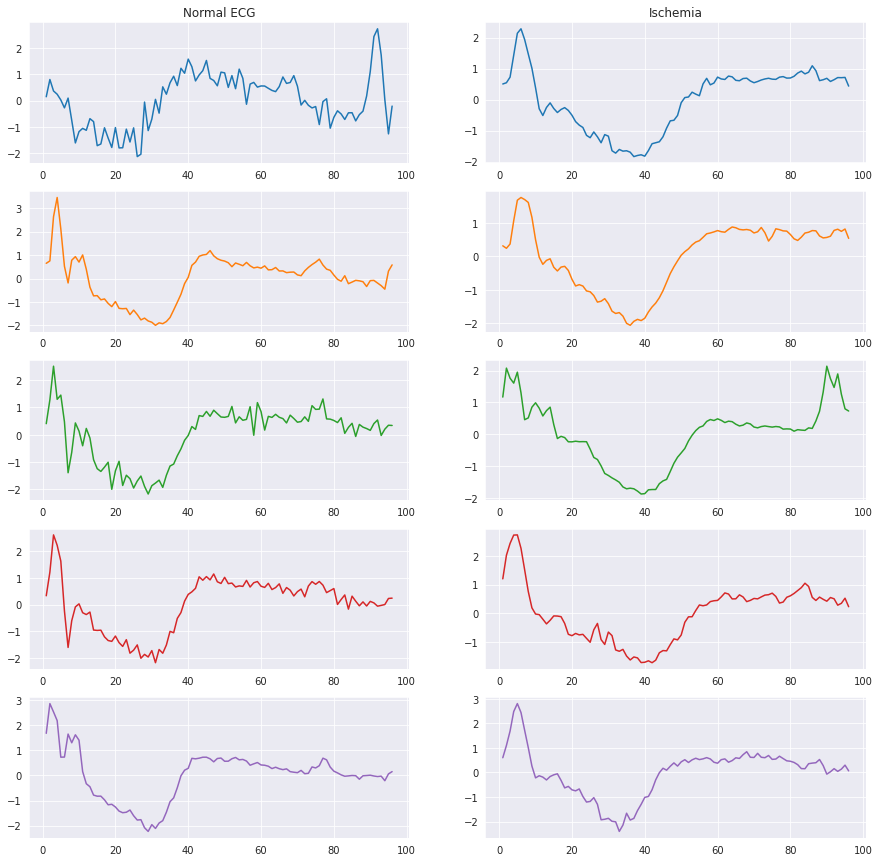

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))
train_df[train_df[0]==1].drop(columns=[0]).head().T\
    .plot(ax=axs[:, 0], subplots=True, legend=False)
train_df[train_df[0]==-1].drop(columns=[0]).head().T\
    .plot(ax=axs[:, 1], subplots=True, legend=False)
axs[0, 0].set_title("Normal ECG")
axs[0, 1].set_title("Ischemia");

### Czy rekordy tworzą razem jedną spójną serię czasową?

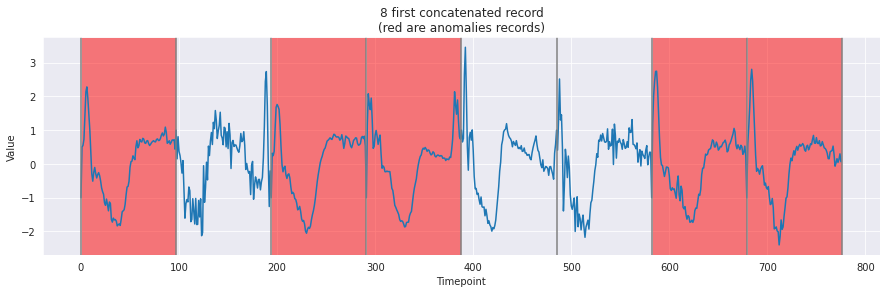

In [5]:
rec_len = train_df.shape[1]
n_first_rec = 8
ax = pd.concat([train_df.iloc[i] for i in train_df.index[:n_first_rec]], ignore_index=True)\
    .plot(figsize=(15, 4))
for i in range(n_first_rec + 1):
    plt.axvline(i * rec_len, c="gray")
for i in train_df.iloc[:n_first_rec].loc[train_df[0]==-1].index:
    plt.axvspan(i * rec_len, (i+1) * rec_len, facecolor='r', alpha=0.5)
ax.set(
    xlabel ='Timepoint',
    ylabel ='Value',
    title="%d first concatenated record\n(red are anomalies records)" % n_first_rec
);

Obserwując na niektórych granicach serii czasowych skoki, można dojść do wniosku, że nie tworzą jednej serii czasowej. Mają za to podobne charakterystyki.

# Badanie charakterystyk

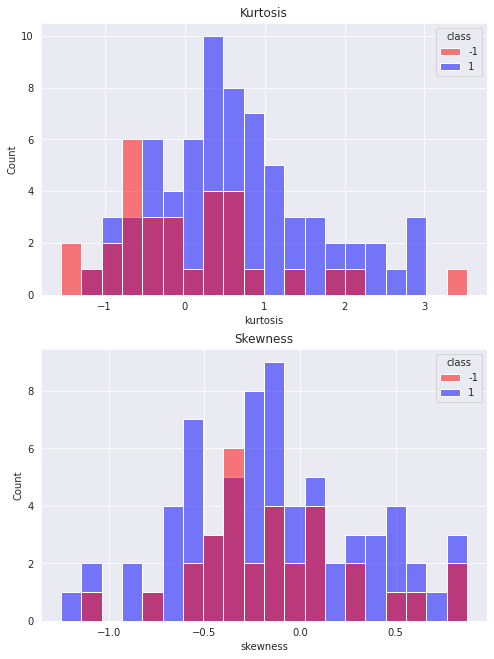

In [6]:
df = pd.DataFrame(data={
    "kurtosis": X_train.kurt(axis=1),
    "skewness": X_train.skew(axis=1),
    "class": y_train
})
fig, axs = plt.subplots(2, figsize=(8, 11))
sns.histplot(
    data=df,
    x="kurtosis",
    hue="class",
    bins=20,
    palette=["red", "blue"],
    ax=axs[0]
).set_title("Kurtosis")
sns.histplot(
    data=df,
    x="skewness",
    hue="class",
    bins=20,
    palette=["red", "blue"],
    ax=axs[1]
).set_title("Skewness");

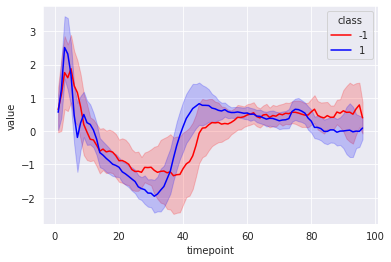

In [7]:
from numpy import median
df = X_train.stack().reset_index().rename(
    columns={
        "level_0": "record_id",
        "level_1": "timepoint",
        0: "value"
    }
)
df["class"] = df.apply(lambda x: y_train[x["record_id"]], axis=1)
sns.lineplot(
    data=df, 
    x="timepoint", 
    y="value", 
    hue="class",
    palette=["red", "blue"],
    estimator=median,
    ci="sd" # ci - confidence intervals, sd - standard deviation
);